<a href="https://colab.research.google.com/github/rtajeong/M3_new_2025/blob/main/lab35_decisiontree_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classifier
- Iris dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


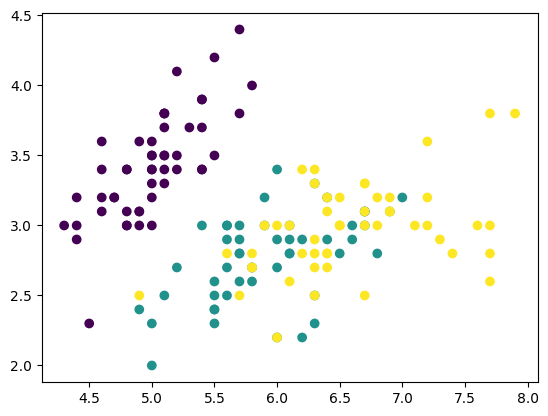

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data[:, :2] , iris.target
print(iris.feature_names, iris.target_names)
plt.scatter(X[:,0], X[:,1], c=y)

In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)
clf.score(X, y)

0.7733333333333333

# Plotting Decision Trees
- using tree.plot_tree
- using graphviz library

[Text(0.5, 0.8333333333333334, 'x[0] <= 5.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.5, 'x[1] <= 2.8\ngini = 0.237\nsamples = 52\nvalue = [45, 6, 1]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.449\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.043\nsamples = 45\nvalue = [44, 1, 0]'),
 Text(0.75, 0.5, 'x[0] <= 6.15\ngini = 0.546\nsamples = 98\nvalue = [5, 44, 49]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.508\nsamples = 43\nvalue = [5.0, 28.0, 10.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.413\nsamples = 55\nvalue = [0, 16, 39]')]

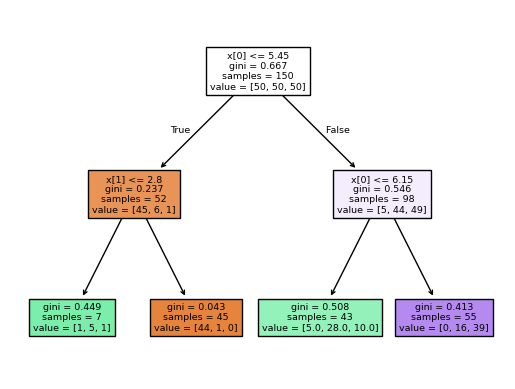

In [4]:
from sklearn import tree
tree.plot_tree(clf, filled=True) # filled=True -> paint to indicate majority class

Graphviz 설치
--

- graphviz.org 사이트에서 다운로드 후 설치
- 윈도우 버전:
- https://graphviz.gitlab.io/_pages/Download/Download_windows.html

- export_graphviz(): Export a decision tree in DOT format. This function generates a GraphViz representation of the decision tree, which is then written into out_file
- dot file: DOT is a graph description language. DOT graphs are typically files with the filename extension gv or dot.

In [5]:
# graphvis 실행시 path 문제가 있는 경우
# - 내 PC (오른쪽 마우스 클릭) -> 속성 -> 고급시스템 -> 환경변수 (시스템변수) -> path 에 graphviz path 추가

In [6]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
    clf,
    out_file = "./iris.dot",
    feature_names = iris.feature_names[:2],
    class_names = iris.target_names,
    filled = True
    )

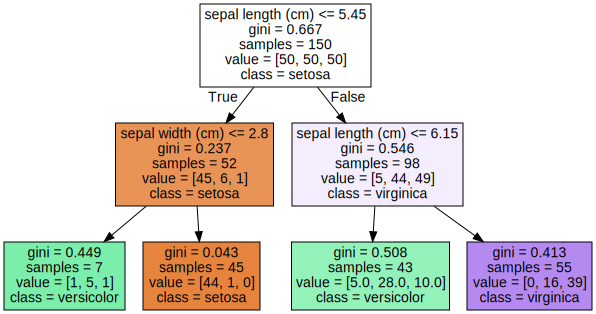

In [7]:
with open("./iris.dot") as f:
    dot_graph = str(open("./iris.dot", "rb").read(), "utf8")
graphviz.Source(dot_graph)

결정 경계선 그리기
--

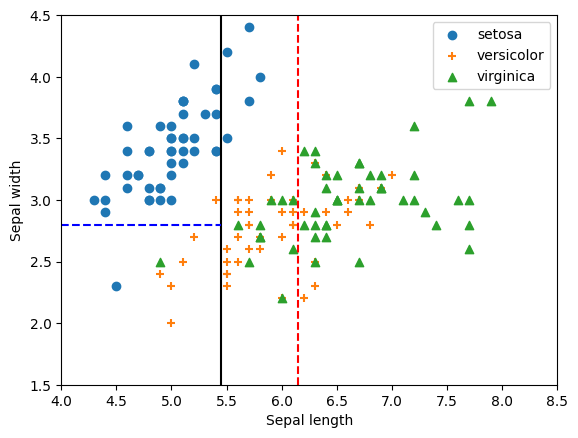

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)

markers = ['o', '+', '^']
for i in range(3):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")


# 결정 트리 경계선: 실선은 루트 노드 점선은 자식 노드
xx = np.linspace(5.45, 5.45, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '-k') # 검정색 실선

xx = np.linspace(4, 5.45, 3)
yy = np.linspace(2.8, 2.8, 3)
plt.plot(xx, yy, '--b') # 파란색 점선

xx = np.linspace(6.15, 6.15, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '--r') # 붉은색 점선


In [9]:
print(clf.predict([[5.2, 4]]))   # prediction

[0]


In [10]:
print(clf.predict_proba([[5.5, 4]]))   # prediction probability

[[0.11627907 0.65116279 0.23255814]]


## 트리 내부 변수
### 유방암 분류

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
cancer = load_breast_cancer()

In [13]:
cancer.data.shape, cancer.feature_names

((569, 30),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [14]:
np.random.seed(9)
# stratify: If not None, data is split in a stratified fashion, using this as the class labels.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)

In [15]:
X_train.shape, y_train.shape, X_test.shape

((426, 30), (426,), (143, 30))

In [16]:
len(y_train[y_train == 1])/len(y_train), len(y_test[y_test == 1])/len(y_test)

(0.6267605633802817, 0.6293706293706294)

In [17]:
len(y_train[y_train == 0])/len(y_train), len(y_test[y_test == 0])/len(y_test)

(0.3732394366197183, 0.3706293706293706)

- class 0 과 class 1인 데이터들이 train data 와 test data 에 고루 분포되어 있음을 확인하였다.

In [18]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.916083916083916


- feature importance: The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.
- The higher the value, the more important the feature.
- 결정트리를 만드는데 기여한 정도

In [19]:
list(zip(cancer.feature_names, clf.feature_importances_.round(4)))

[(np.str_('mean radius'), np.float64(0.0)),
 (np.str_('mean texture'), np.float64(0.0417)),
 (np.str_('mean perimeter'), np.float64(0.0)),
 (np.str_('mean area'), np.float64(0.0)),
 (np.str_('mean smoothness'), np.float64(0.0)),
 (np.str_('mean compactness'), np.float64(0.0)),
 (np.str_('mean concavity'), np.float64(0.0)),
 (np.str_('mean concave points'), np.float64(0.0426)),
 (np.str_('mean symmetry'), np.float64(0.0114)),
 (np.str_('mean fractal dimension'), np.float64(0.0)),
 (np.str_('radius error'), np.float64(0.0)),
 (np.str_('texture error'), np.float64(0.0)),
 (np.str_('perimeter error'), np.float64(0.0)),
 (np.str_('area error'), np.float64(0.0172)),
 (np.str_('smoothness error'), np.float64(0.0024)),
 (np.str_('compactness error'), np.float64(0.012)),
 (np.str_('concavity error'), np.float64(0.0)),
 (np.str_('concave points error'), np.float64(0.0)),
 (np.str_('symmetry error'), np.float64(0.0)),
 (np.str_('fractal dimension error'), np.float64(0.0)),
 (np.str_('worst radius

In [20]:
df = pd.DataFrame({'feature':cancer.feature_names,'importance':clf.feature_importances_ })
df.head()

,feature,importance
0,mean radius,0.00000
1,mean texture,0.04172
2,mean perimeter,0.00000
3,mean area,0.00000
4,mean smoothness,0.00000


In [21]:
df = df.sort_values(by='importance', ascending=False)
print(df.head(20))

                   feature  importance
22         worst perimeter    0.694689
27    worst concave points    0.121068
7      mean concave points    0.042647
1             mean texture    0.041720
21           worst texture    0.039639
13              area error    0.017216
20            worst radius    0.017188
15       compactness error    0.012042
8            mean symmetry    0.011405
14        smoothness error    0.002385
5         mean compactness    0.000000
4          mean smoothness    0.000000
2           mean perimeter    0.000000
0              mean radius    0.000000
12         perimeter error    0.000000
11           texture error    0.000000
10            radius error    0.000000
9   mean fractal dimension    0.000000
6           mean concavity    0.000000
3                mean area    0.000000


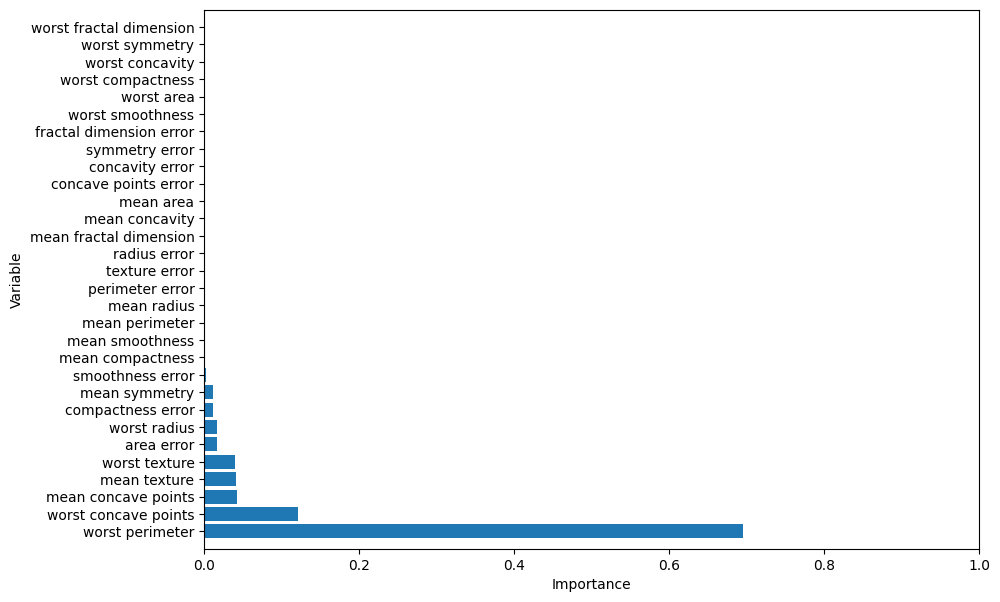

In [22]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

# DecisionTree Regressor
- see lab43a_nonlinear_regression.ipynb

In [23]:
# exercise for tree regressor()
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X = iris.data[:,:2]
y = iris.data[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tr_reg1 = DecisionTreeRegressor(max_depth=2)
tr_reg2 = DecisionTreeRegressor(max_depth=5)
tr_reg1.fit(X_train,y_train)
tr_reg2.fit(X_train,y_train)
tr_reg1.score(X_test, y_test), tr_reg2.score(X_test, y_test)

(0.8514739164227154, 0.9537032997563404)

[Text(0.5, 0.8333333333333334, 'x[0] <= 5.45\nsquared_error = 3.105\nsamples = 120\nvalue = 3.745'),
 Text(0.25, 0.5, 'x[1] <= 2.8\nsquared_error = 0.772\nsamples = 43\nvalue = 1.826'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.845\nsamples = 7\nvalue = 3.257'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.282\nsamples = 36\nvalue = 1.547'),
 Text(0.75, 0.5, 'x[0] <= 5.85\nsquared_error = 1.201\nsamples = 77\nvalue = 4.817'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 1.406\nsamples = 23\nvalue = 3.787'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.469\nsamples = 54\nvalue = 5.256')]

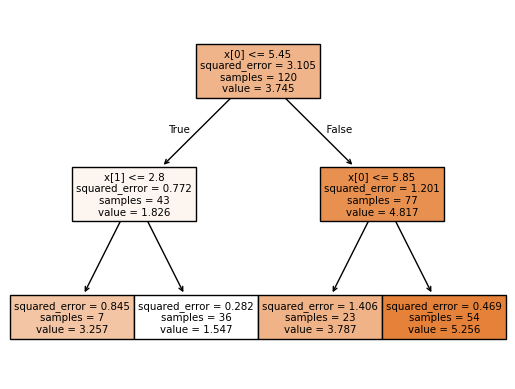

In [24]:
tree.plot_tree(tr_reg1, filled=True)

In [25]:
tr_reg1.feature_importances_, tr_reg2.feature_importances_

(array([0.94265602, 0.05734398]), array([0.85056276, 0.14943724]))

MSE:  0.024100595238095233 R2 score:  0.9574653156221915


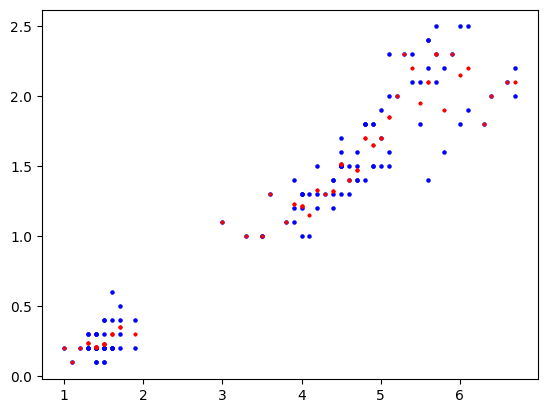

In [26]:
# predicting petal width (y) from petal length (x)
from sklearn.metrics import mean_squared_error, r2_score

X = iris.data[:,2]
y = iris.data[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tr_reg3 = DecisionTreeRegressor(max_depth=10)
tr_reg3.fit(X_train.reshape(-1,1),y_train)
tr_reg3.score(X_test.reshape(-1,1), y_test)

y_pred = tr_reg3.predict(X_train.reshape(-1,1))
plt.scatter(X_train, y_train, c='b', s = 5)   # real
plt.scatter(X_train, y_pred, c ='r', s = 3)   # prediction

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)           # same as score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)


# Exercise
- categorical features (should always use Onehot encoding or Ordinal encoding)

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

X = pd.DataFrame()
X['A'] = ['a','a','b','a', 'a','b','c']
X['B'] = ['x','x','y','x','x','y','w']
X['C'] = [0, 0, 1, 0, 0, 2, 3]
y = [0, 1, 1, 0, 1, 1, 0]

pd.concat([pd.DataFrame(X), pd.Series(y, name='y')], axis=1)

,A,B,C,y
0,a,x,0,0
1,a,x,0,1
2,b,y,1,1
3,a,x,0,0
4,a,x,0,1
5,b,y,2,1
6,c,w,3,0


In [28]:
X_enc = pd.concat([pd.get_dummies(X[['A','B']]), X['C']], axis=1)
pd.concat([X_enc, pd.Series(y, name='y')], axis=1)

,A_a,A_b,A_c,B_w,B_x,B_y,C,y
0,True,False,False,False,True,False,0,0
1,True,False,False,False,True,False,0,1
2,False,True,False,False,False,True,1,1
3,True,False,False,False,True,False,0,0
4,True,False,False,False,True,False,0,1
5,False,True,False,False,False,True,2,1
6,False,False,True,True,False,False,3,0


In [29]:
tr_clf = DecisionTreeClassifier(max_depth=2)
tr_clf.fit(X_enc, y)

DecisionTreeClassifier(max_depth=2)

In [30]:
tr_clf.score(X_enc, y)

0.7142857142857143

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.4, 0.5, 'x[2] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7, 0.6666666666666667, '  False')]

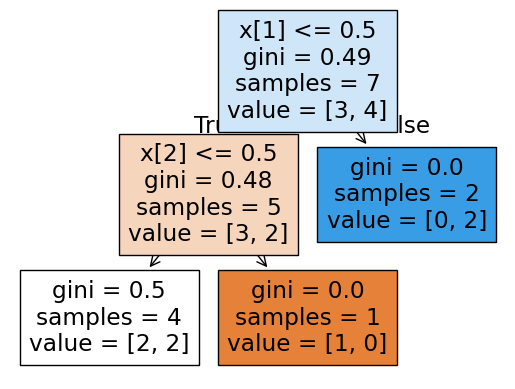

In [31]:
tree.plot_tree(tr_clf, filled=True)

In [32]:
tr_clf.classes_, tr_clf.max_features_, tr_clf.feature_importances_

(array([0, 1]), 7, array([0.  , 0.72, 0.28, 0.  , 0.  , 0.  , 0.  ]))